# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [149]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [150]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [151]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =  city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, # YOUR CODE HERE
                          "Lat": city_lat, # YOUR CODE HERE
                          "Lng": city_lng, # YOUR CODE HERE
                          "Max Temp": city_max_temp, # YOUR CODE HERE
                          "Humidity": city_humidity, # YOUR CODE HERE
                          "Cloudiness": city_clouds, # YOUR CODE HERE
                          "Wind Speed": city_wind, # YOUR CODE HERE
                          "Country": city_country, # YOUR CODE HERE
                          "Date": city_date}) # YOUR CODE HERE

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | del rio
Processing Record 4 of Set 1 | patong
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | ust'-barguzin
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | tsiombe
Processing Record 11 of Set 1 | imbituba
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | san juan del cesar
Processing Record 14 of Set 1 | chibougamau
Processing Record 15 of Set 1 | mabaruma
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | pogradec
Processing Record 21 of Set 1 | thompson
Processing Record 22 o

In [152]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [153]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,16.29,88,0,5.14,ZA,1699151086
1,del rio,29.3627,-100.8968,23.06,64,0,3.60,US,1699151010
2,patong,7.8961,98.2966,29.08,76,68,1.63,TH,1699151088
3,port-aux-francais,-49.3500,70.2167,4.24,80,99,11.66,TF,1699151088
4,arraial do cabo,-22.9661,-42.0278,22.30,76,93,6.15,BR,1699151084


In [154]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [155]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,16.29,88,0,5.14,ZA,1699151086
1,del rio,29.3627,-100.8968,23.06,64,0,3.60,US,1699151010
2,patong,7.8961,98.2966,29.08,76,68,1.63,TH,1699151088
3,port-aux-francais,-49.3500,70.2167,4.24,80,99,11.66,TF,1699151088
4,arraial do cabo,-22.9661,-42.0278,22.30,76,93,6.15,BR,1699151084


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

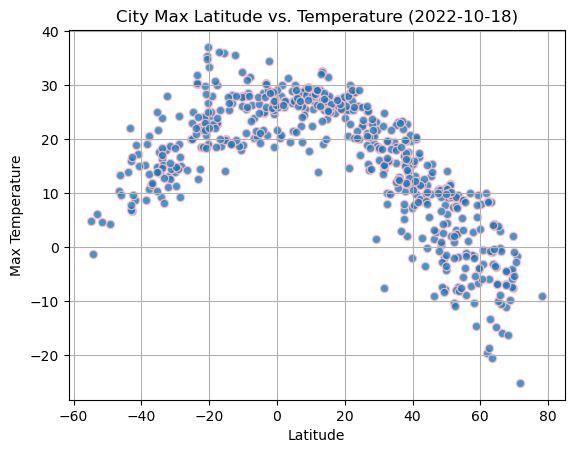

In [156]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="pink", marker="o", alpha=0.80)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

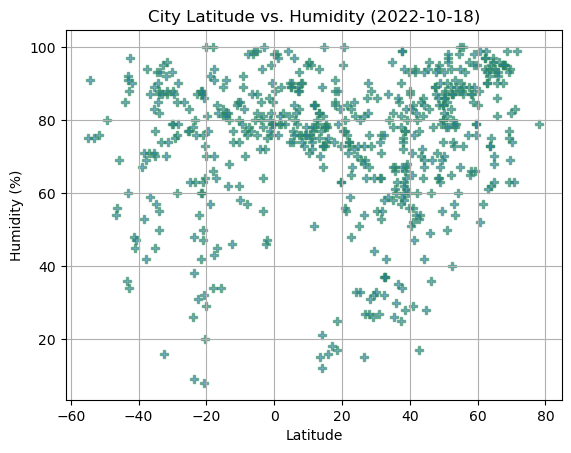

In [157]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="seagreen", marker="P", alpha=0.60)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

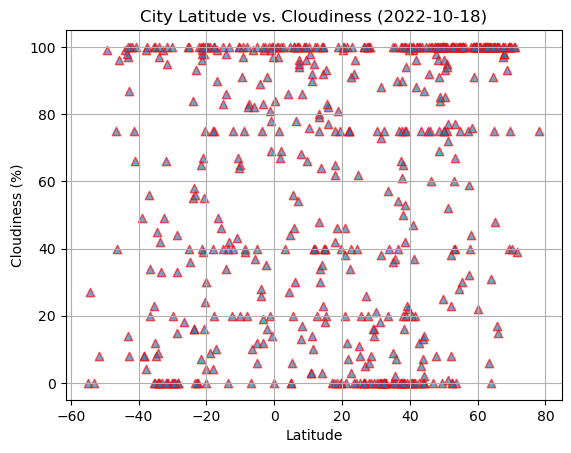

In [158]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="red", marker="^", alpha=0.65)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

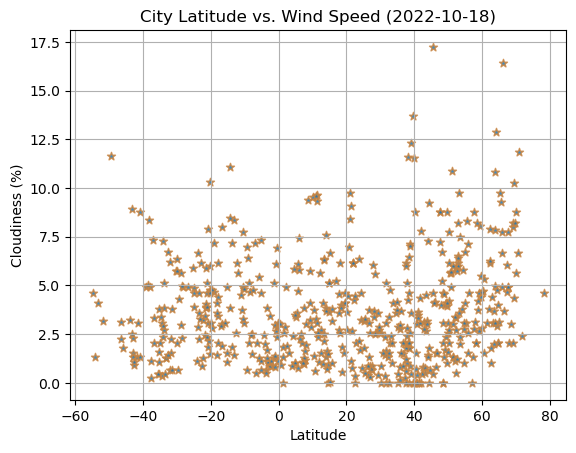

In [159]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="peru", marker="*", alpha=0.85)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [160]:
# Define a function to create Linear Regression plots
## YOUR CODE HERE
def regression():
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x_values, y_values)
    regress_values=x_values * slope + intercept
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r-")
    line_eq="y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))
    plt.annotate(line_eq,(0,12),fontsize=15,color="red")
    print(f'The r-value is : {rvalue}')



In [161]:
## Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
## YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,del rio,29.3627,-100.8968,23.06,64,0,3.60,US,1699151010
2,patong,7.8961,98.2966,29.08,76,68,1.63,TH,1699151088
5,ust'-barguzin,53.4500,108.9833,-7.42,78,67,2.35,RU,1699151089
10,vorgashor,67.5833,63.9500,-6.80,90,97,7.75,RU,1699151091
11,san juan del cesar,10.7711,-73.0031,25.53,95,3,0.63,CO,1699151091


In [162]:
## Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
## YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,16.29,88,0,5.14,ZA,1699151086
3,port-aux-francais,-49.3500,70.2167,4.24,80,99,11.66,TF,1699151088
4,arraial do cabo,-22.9661,-42.0278,22.30,76,93,6.15,BR,1699151084
6,puerto natales,-51.7236,-72.4875,4.58,76,8,3.19,CL,1699151089
7,waitangi,-43.9535,-176.5597,13.85,85,99,3.23,NZ,1699151090


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8755280905145363


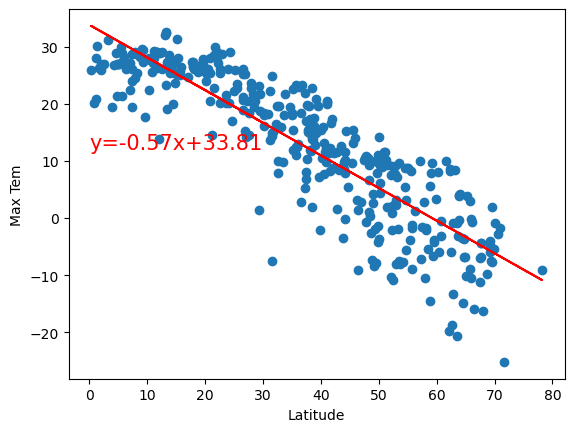

In [163]:
## Linear regression on Northern Hemisphere
## YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Max Tem')
plt.show()

The r-value is : 0.716759221009651


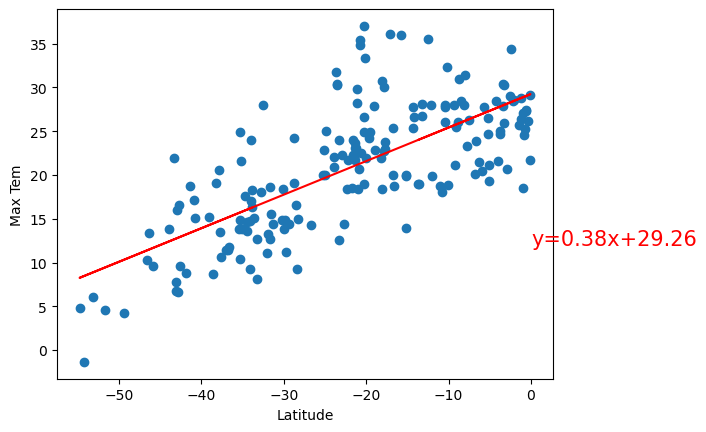

In [164]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Max Tem')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.15220067863471592


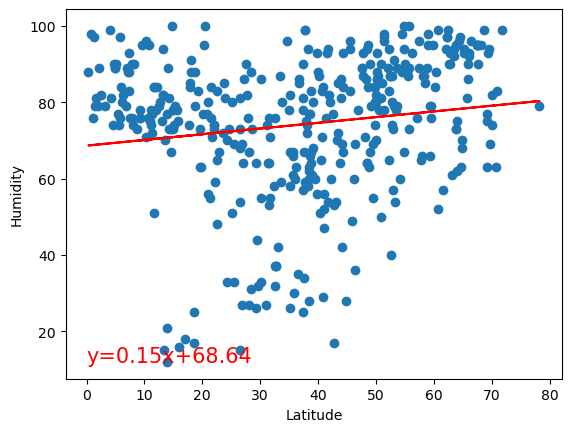

In [165]:
# Northern Hemisphere
## YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is : 0.12447451112321113


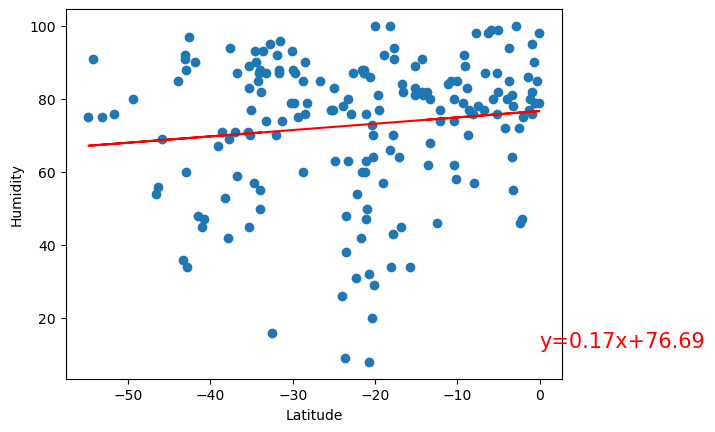

In [166]:
# Southern Hemisphere
## YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.21977287985160968


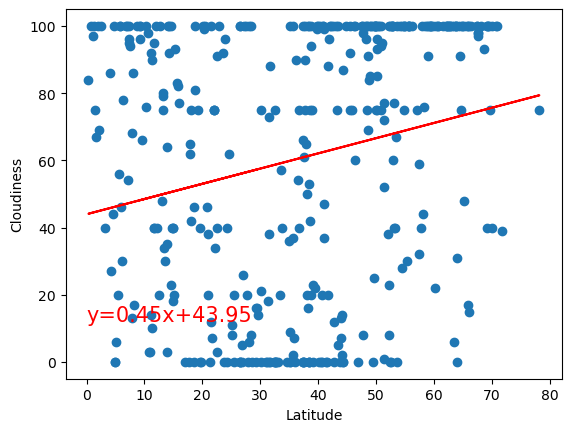

In [167]:
# Northern Hemisphere
## YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is : 0.15921309070123046


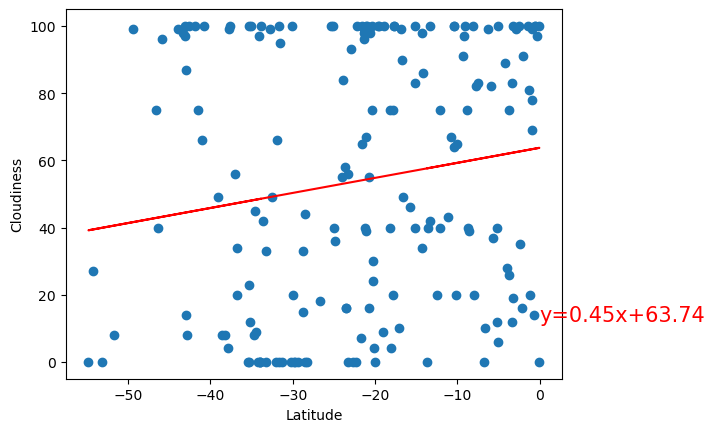

In [168]:
# Southern Hemisphere
## YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.2395588803852541


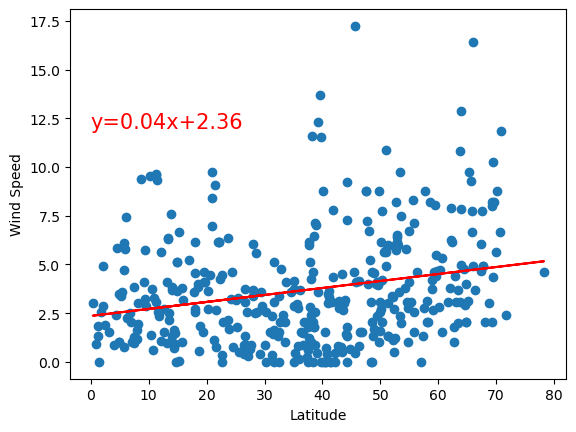

In [169]:
# Northern Hemisphere
## YOUR CODE HERE
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is : -0.02873007822251395


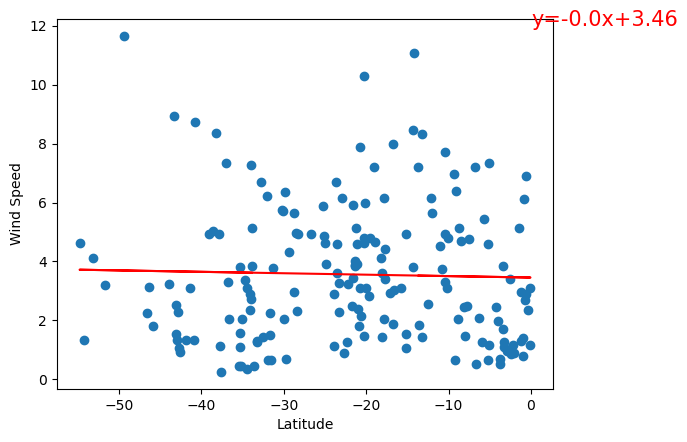

In [170]:
# Southern Hemisphere
## YOUR CODE HERE
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
regression()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [171]:
# As we can see, the parameter most visible changing while changing the latitude is the max temperature. It is notary that in both northern and southern coordinates, the temperature goes up while the latitude tends to 0. However, the changes in parameters such as cloudiness, humidity, and wind speed are more subtle while moving from south to north.